In [1]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Desktop/Automobile_insurance_fraud.csv")  # Importing the data

In [3]:
df.head() # Checking frist five elements

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [4]:
df.tail() # Checking last five elements

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN
999,456,60,556080,11-11-1996,OH,250/500,1000,766.19,0,612260,...,?,5060,460,920,3680,Mercedes,E400,2007,N,NaN


In [5]:
df.shape # We have 908 rows and 25 coulmns

(1000, 40)

In [6]:
df.info() # We have some depreciated values in our data set and will take care of them later.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [7]:
df.drop(['_c39'], axis = 1, inplace = True)

In [8]:
df.nunique() # Checking how many unique properties each column has

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

In [9]:
df.replace('?', np.nan, inplace = True) # There are some missing values with ?

In [10]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


In [11]:
df.isnull().sum() # Checking null values

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries     

As there are lot of missing values and the data set is small. I will replace them with the mode of each class

In [12]:
df['collision_type'] = df['collision_type'].fillna(df['collision_type'].mode()[0])
df['property_damage'] = df['property_damage'].fillna(df['property_damage'].mode()[0])
df['police_report_available'] = df['police_report_available'].fillna(df['police_report_available'].mode()[0])

In [13]:
numerical_features = df.select_dtypes(exclude=['object']).copy()
print(numerical_features.columns)

Index(['months_as_customer', 'age', 'policy_number', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim',
       'auto_year'],
      dtype='object')


In [14]:
categorical_features = df.select_dtypes(include=['object']).copy()
print(categorical_features.columns)

Index(['policy_bind_date', 'policy_state', 'policy_csl', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'incident_date', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'incident_state', 'incident_city', 'incident_location',
       'property_damage', 'police_report_available', 'auto_make', 'auto_model',
       'fraud_reported'],
      dtype='object')


In [15]:
df['fraud_reported'].value_counts() # Class is imbalanced, I will fix it later

N    753
Y    247
Name: fraud_reported, dtype: int64

### Performing EDA

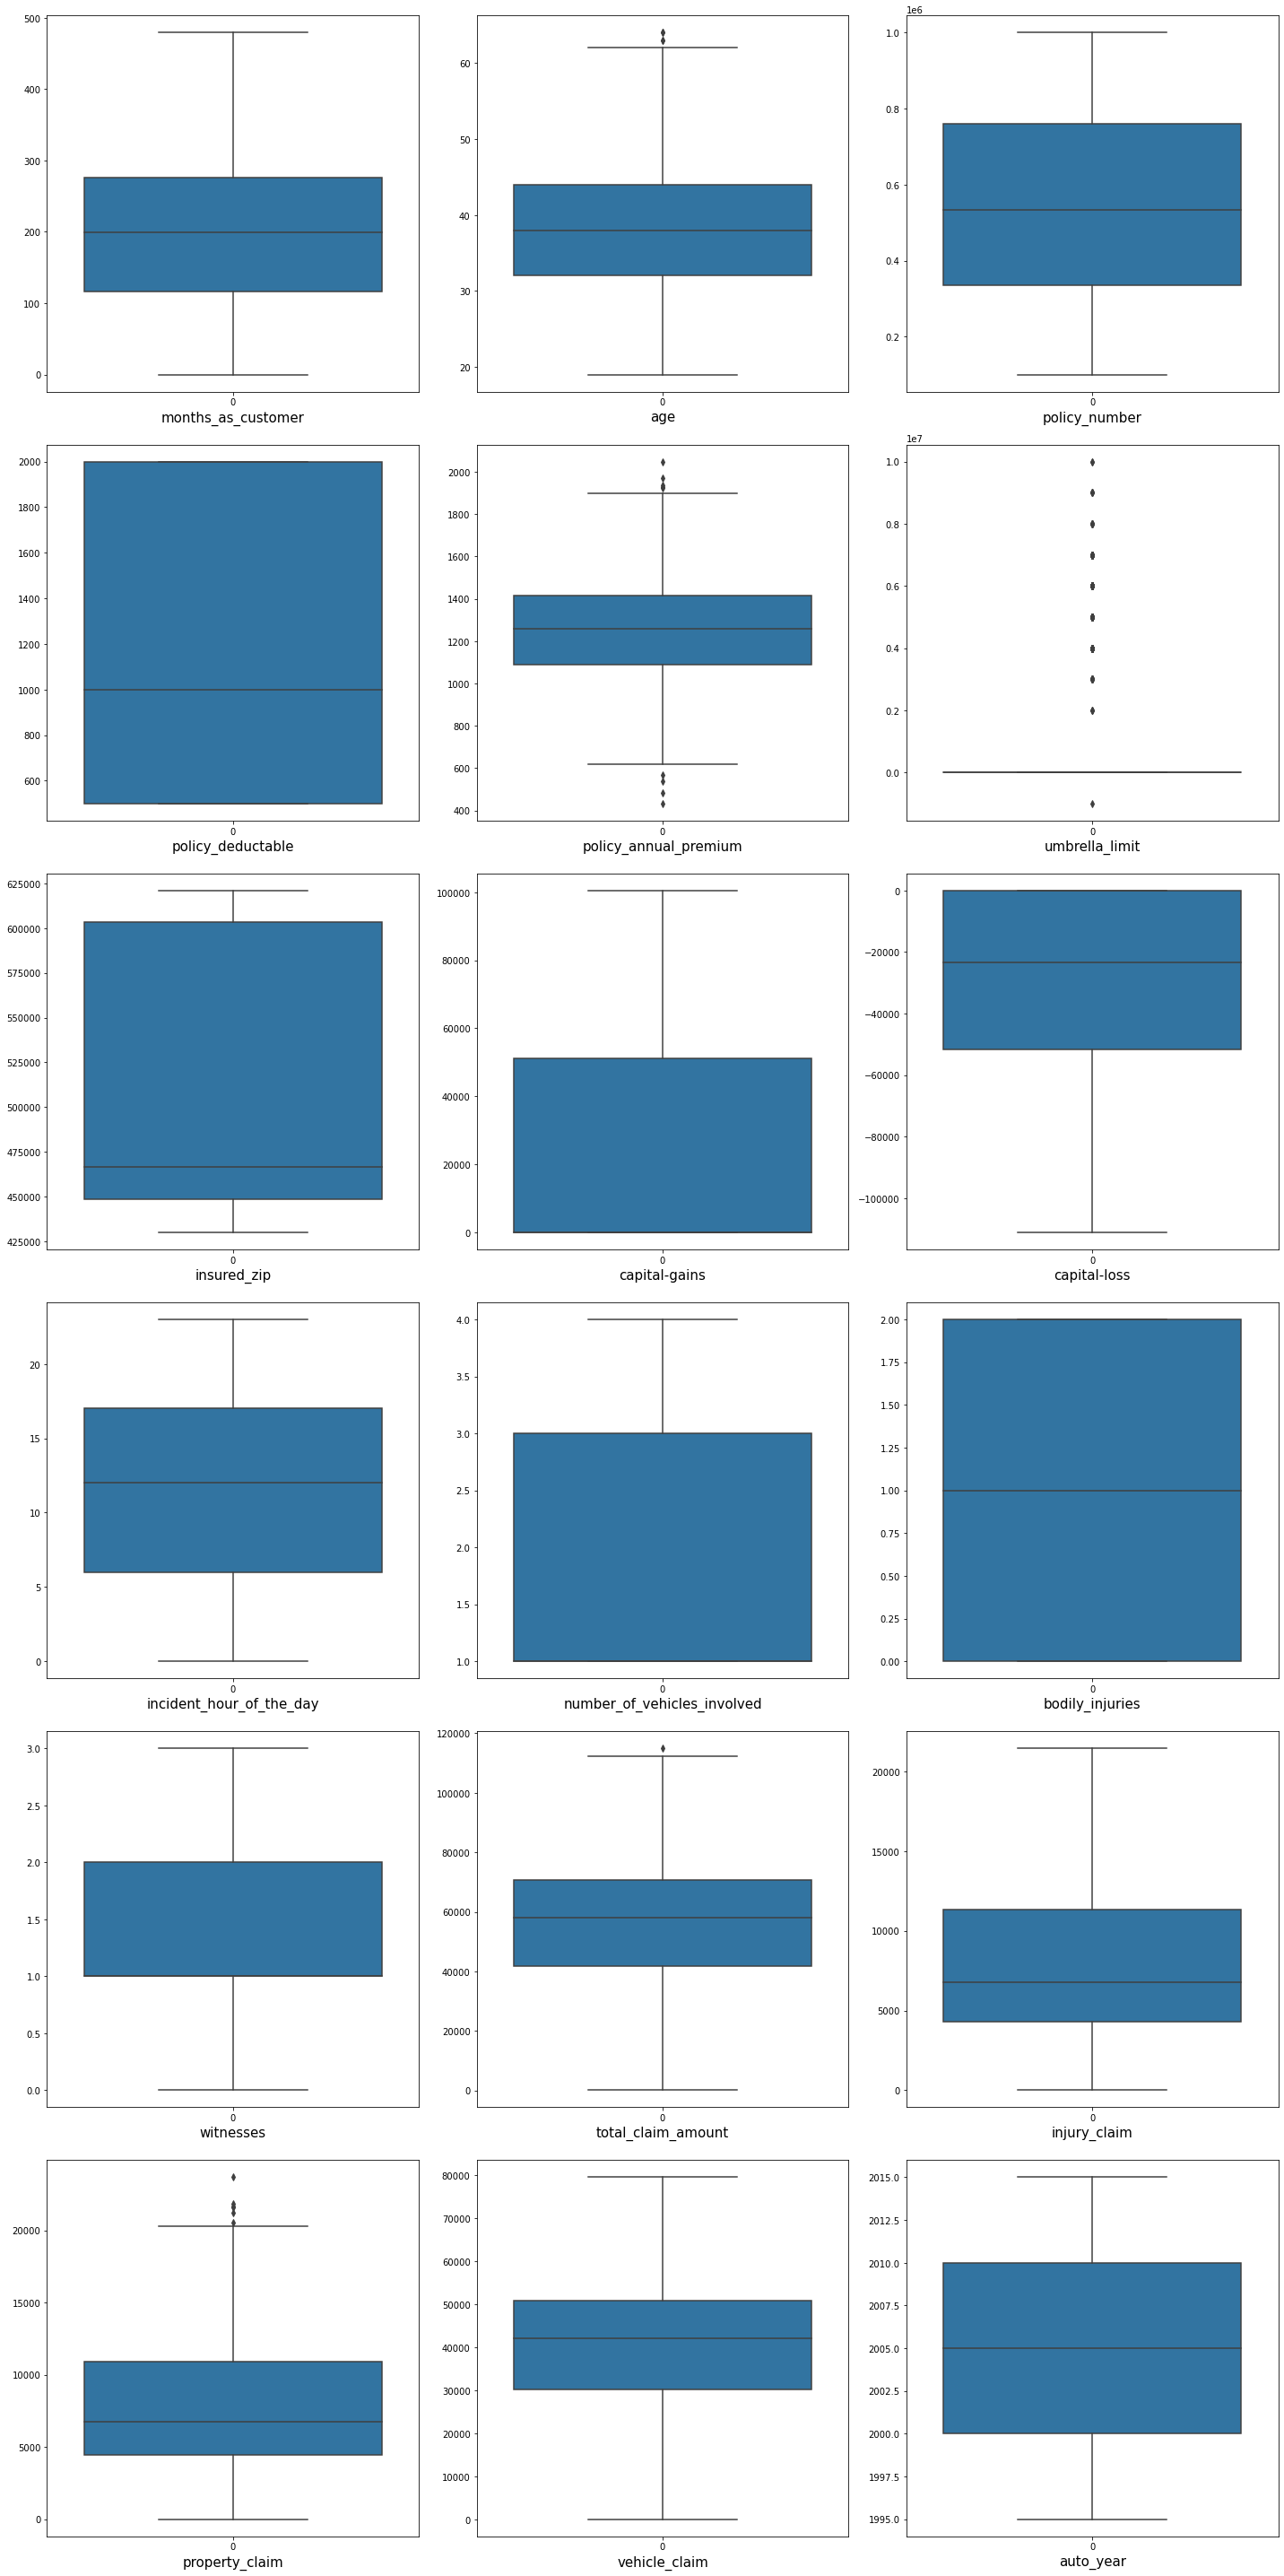

In [16]:
plt.figure(figsize = (20, 40))
num = 1

for col in df[['months_as_customer', 'age', 'policy_number', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim',
       'auto_year']]:
    if num <= 24:
        ax = plt.subplot(6, 3, num)
        sns.boxplot(data = df[col])
        plt.xlabel(col, fontsize = 15)
    
    num += 1
plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

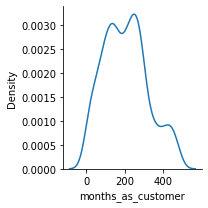

<Figure size 432x288 with 0 Axes>

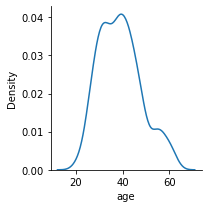

<Figure size 432x288 with 0 Axes>

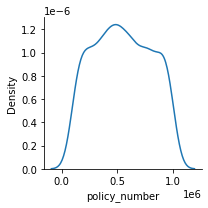

<Figure size 432x288 with 0 Axes>

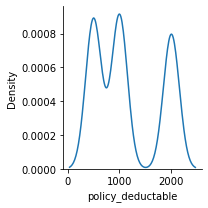

<Figure size 432x288 with 0 Axes>

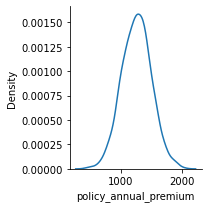

<Figure size 432x288 with 0 Axes>

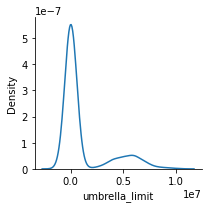

<Figure size 432x288 with 0 Axes>

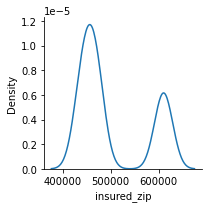

<Figure size 432x288 with 0 Axes>

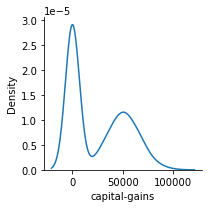

<Figure size 432x288 with 0 Axes>

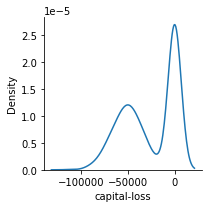

<Figure size 432x288 with 0 Axes>

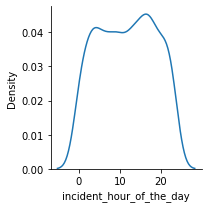

<Figure size 432x288 with 0 Axes>

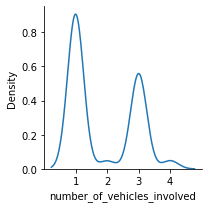

<Figure size 432x288 with 0 Axes>

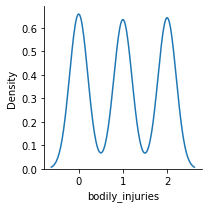

<Figure size 432x288 with 0 Axes>

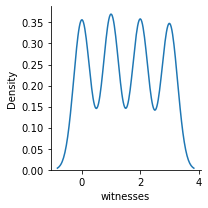

<Figure size 432x288 with 0 Axes>

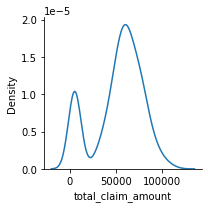

<Figure size 432x288 with 0 Axes>

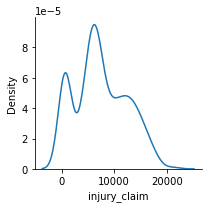

<Figure size 432x288 with 0 Axes>

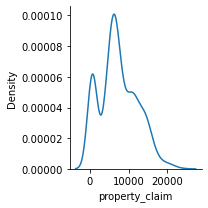

<Figure size 432x288 with 0 Axes>

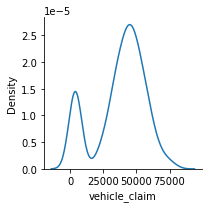

<Figure size 432x288 with 0 Axes>

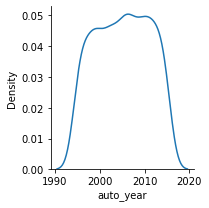

In [17]:
for col in df.select_dtypes(include=['float64','int64']):
    plt.figure()
    sns.displot(df[col],kind='kde',height=3)
    plt.show()

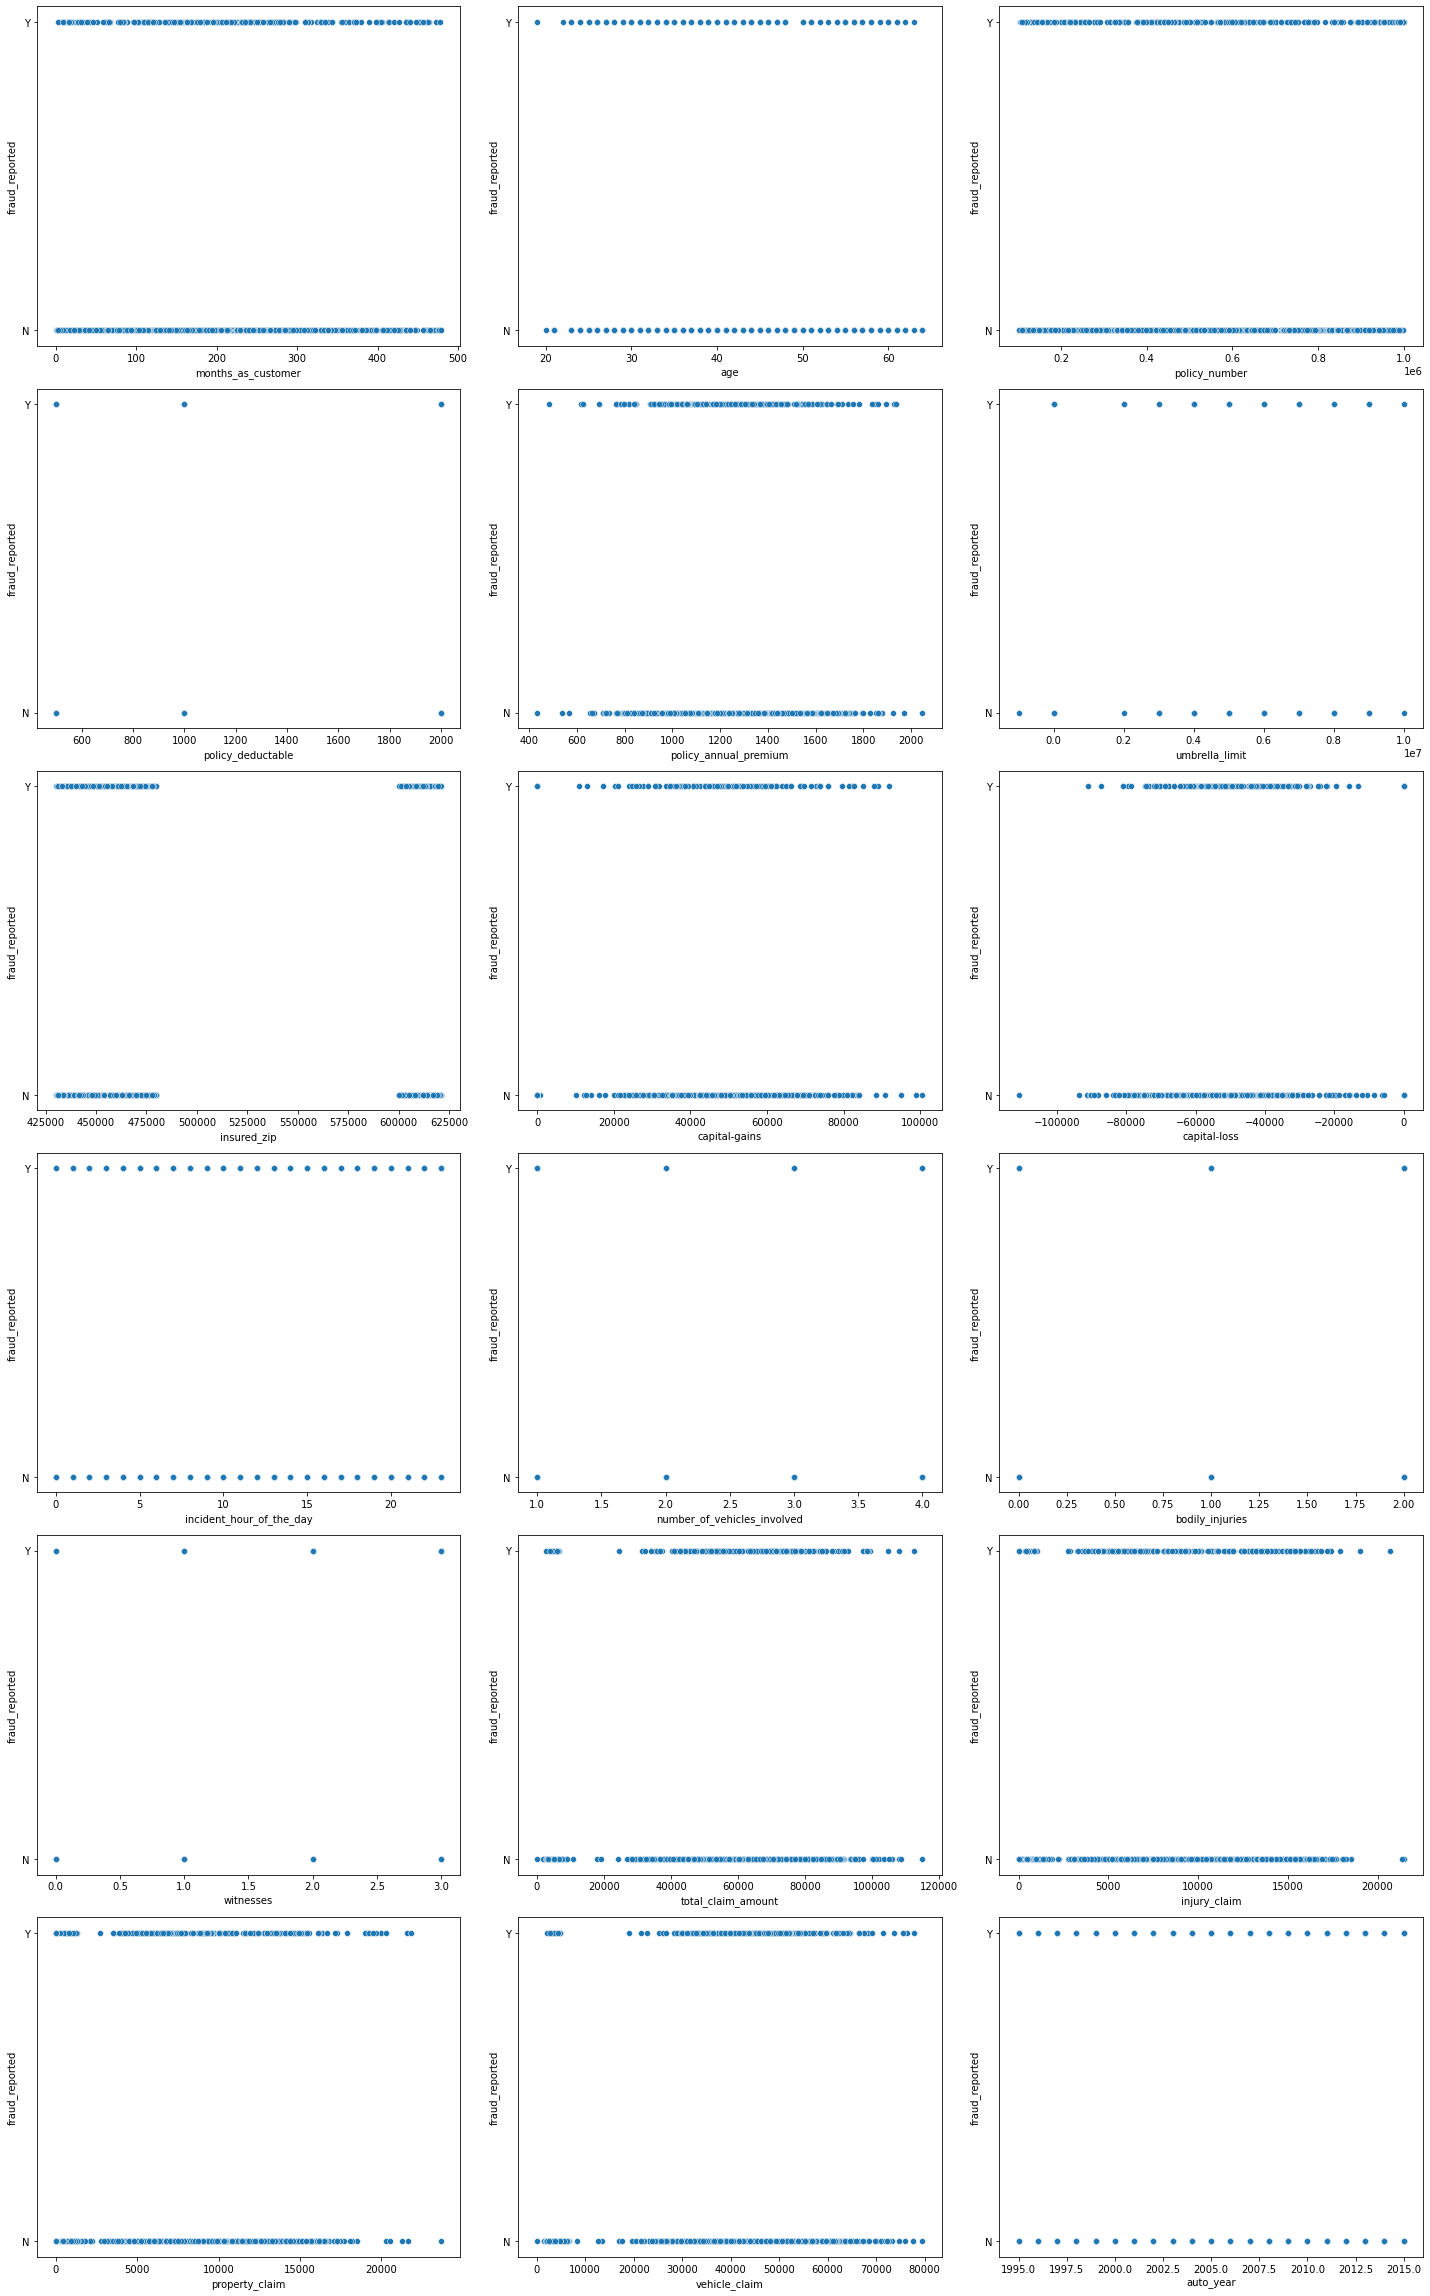

In [18]:
fig = plt.figure(figsize=(20,32))
for i in range(len(numerical_features.columns)):
    fig.add_subplot(6, 3, i+1)
    sns.scatterplot(data = df, x= numerical_features.iloc[:, i],y=df['fraud_reported'])
plt.tight_layout()
plt.show()

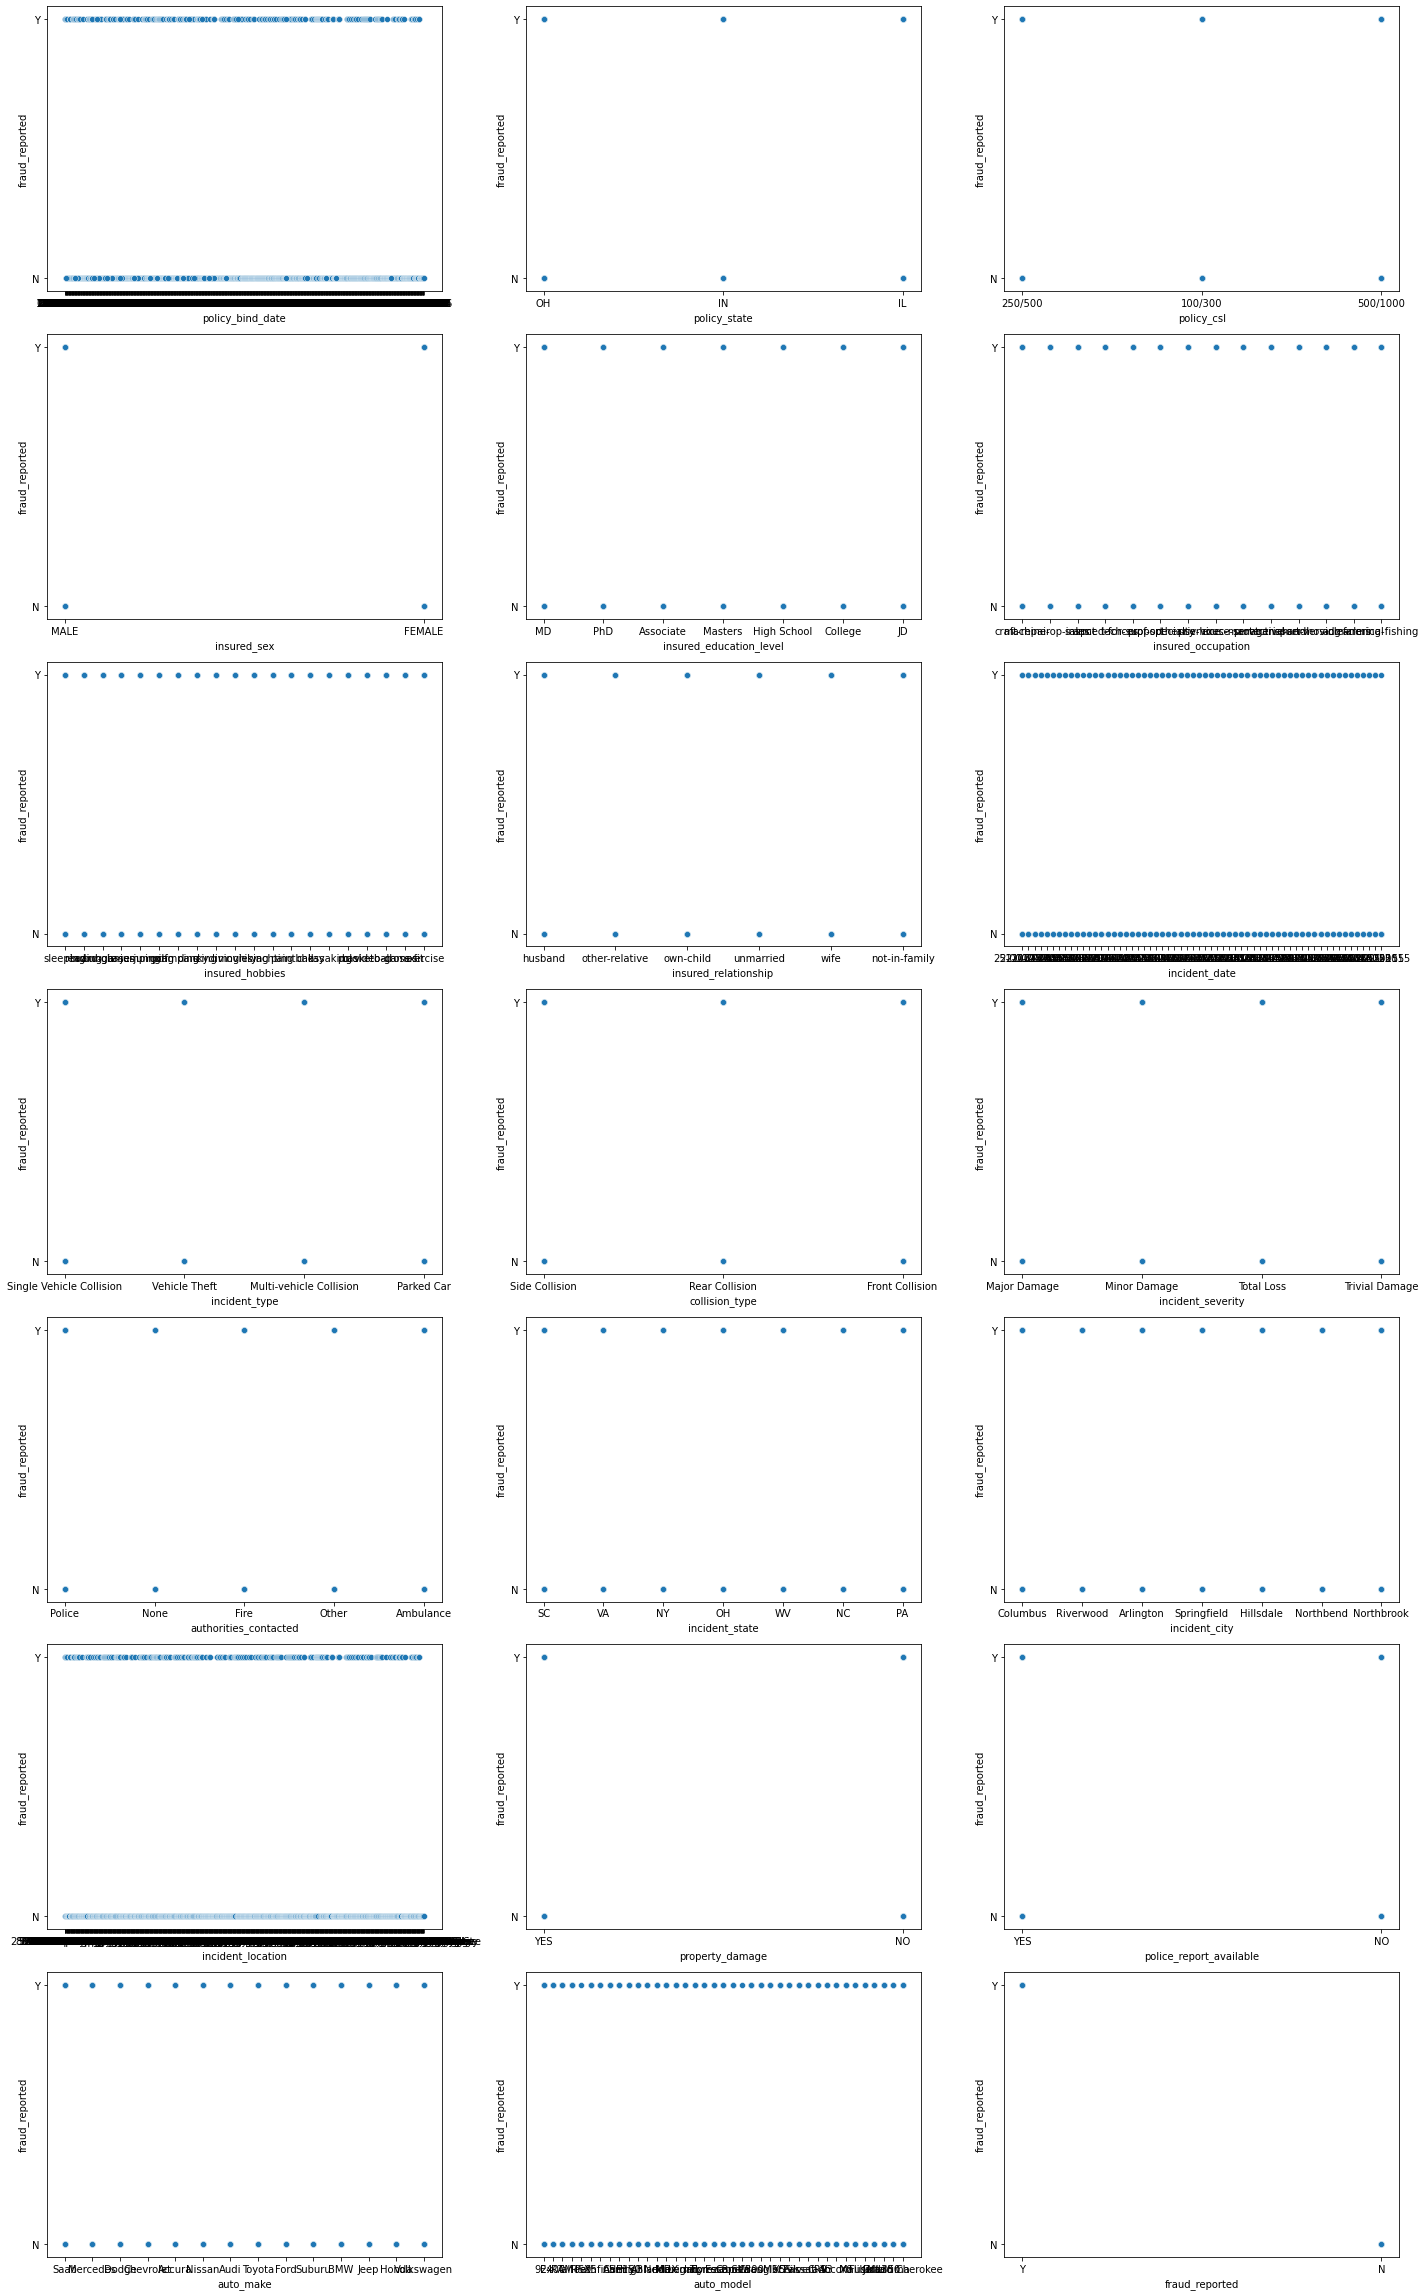

In [19]:
fig = plt.figure(figsize=(20,32))
for i in range(len(categorical_features.columns)):
    fig.add_subplot(7, 3, i+1)
    sns.scatterplot(data = df, x= categorical_features.iloc[:, i],y=df['fraud_reported'])
plt.tight_layout()
plt.show()

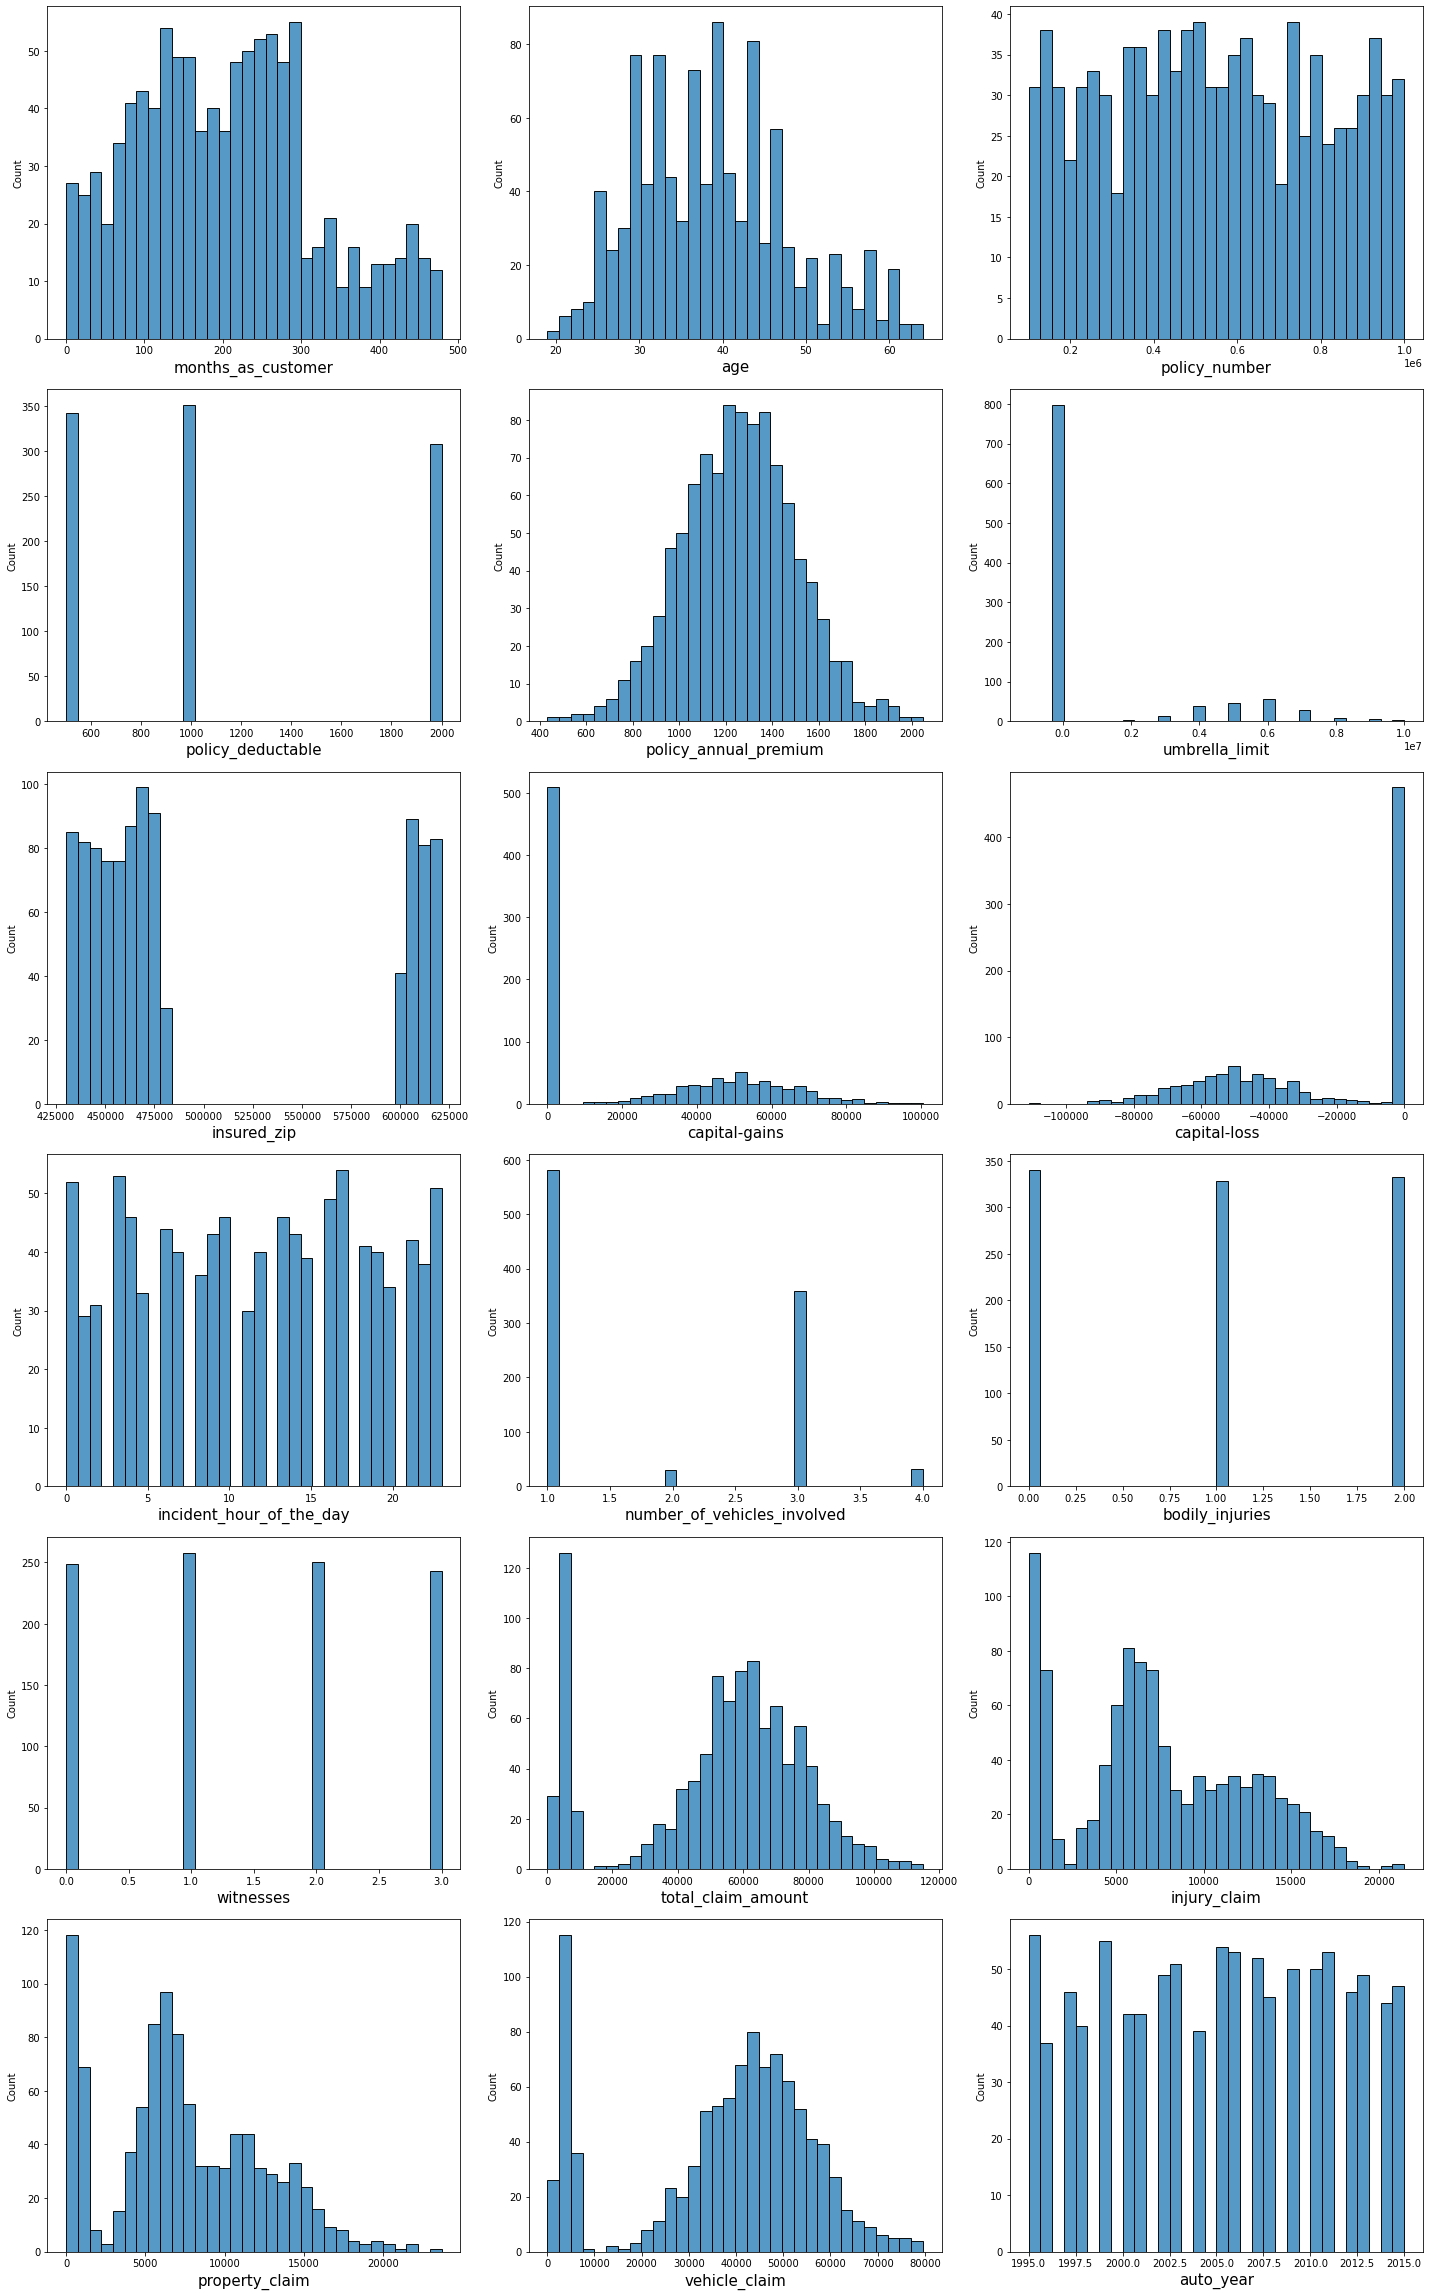

In [20]:
plt.figure(figsize = (20, 32))
plotnumber = 1

for col in df[['months_as_customer', 'age', 'policy_number', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim',
       'auto_year']]:
    if plotnumber <= 24:
        ax = plt.subplot(6, 3, plotnumber)
        sns.histplot(df[col],bins=32)
        plt.xlabel(col, fontsize = 15)
        
    plotnumber += 1
    
plt.tight_layout()
plt.show()

In [21]:
useless = ['policy_number','policy_bind_date','policy_state','insured_zip','incident_location','incident_date',
           'incident_state','incident_city','insured_hobbies','auto_make','auto_model','auto_year']

df.drop(useless, inplace = True, axis = 1)

<AxesSubplot:title={'center':'High Correlation'}>

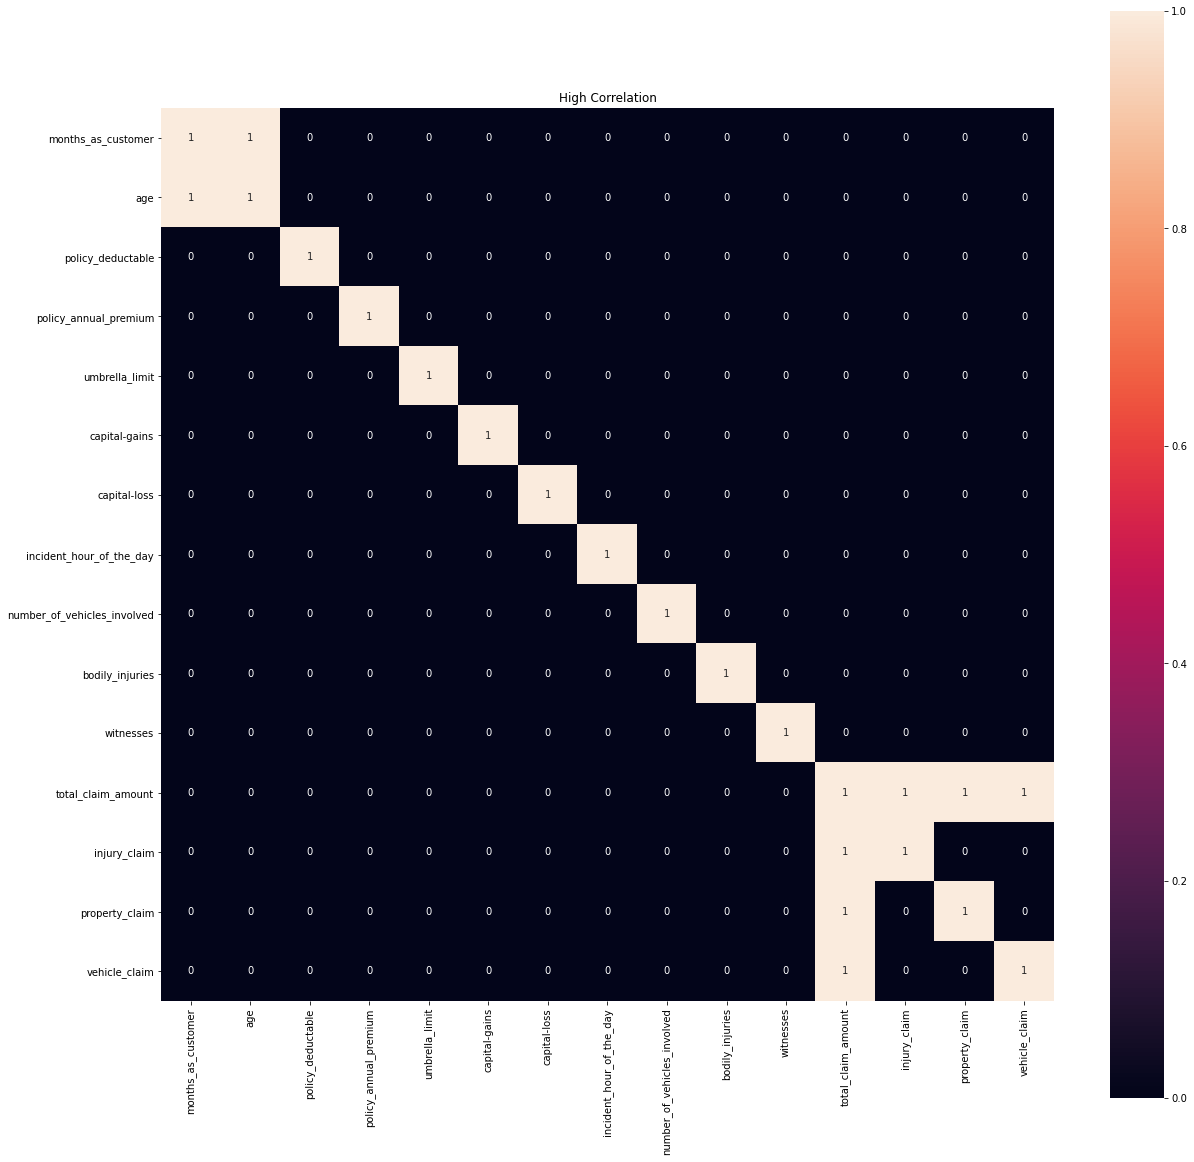

In [22]:
num_correlation = df.select_dtypes(exclude='object').corr()
plt.figure(figsize=(20,20))
plt.title('High Correlation')
sns.heatmap(num_correlation > 0.8, annot=True, square=True)

Some variables have a high co-relation with each other, now I will remove some of them to fix this to prevent overfitting.

In [23]:
high_corr = ['age','total_claim_amount']

df.drop(high_corr, inplace = True, axis = 1)

### Now splitting the data

In [24]:
X = df.drop('fraud_reported', axis = 1)
y = df['fraud_reported']

In [25]:
cat_df = X.select_dtypes(include = ['object'])

In [26]:
cat_df = pd.get_dummies(cat_df, drop_first = True)

In [27]:
num_df = X.select_dtypes(include = ['int64'])

In [28]:
X = pd.concat([num_df, cat_df], axis = 1)

As the data was imbalanced, I will use SMOTE to balance the income to remove bias

In [29]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
Xo, yo = oversample.fit_resample(X, y)

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

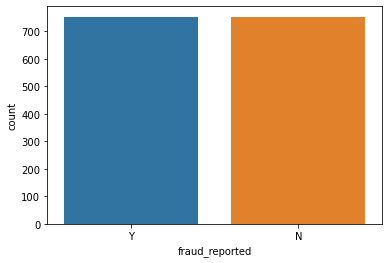

In [30]:
sns.countplot(x=yo)

Splitting the data

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xo, yo, test_size = 0.2, random_state = 5)
print("X Train Shape ",X_train.shape)
print("Y Train Shape ",y_train.shape)

print("X Test Shape ",X_test.shape)
print("Y Test Shape ",y_test.shape)

X Train Shape  (1204, 53)
Y Train Shape  (1204,)
X Test Shape  (302, 53)
Y Test Shape  (302,)


In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() # Standardising the data

In [33]:
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

In [34]:
from sklearn.linear_model import LogisticRegression
from subprocess import check_output
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn                        import metrics, svm
from sklearn import preprocessing
from sklearn import utils
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import linear_model
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report # Importing required libraries

### Decision Tree Classifier

In [35]:
from sklearn.tree import DecisionTreeClassifier
dtr = DecisionTreeClassifier(random_state=1)
dtr.fit(X_train, y_train)
y_pred = dtr.predict(X_test)
dtr.score(X_test, y_test)

0.7947019867549668

In [36]:
scr = cross_val_score(dtr, X,y, cv=5)
print(scr.mean())

0.712


### Random Forest Classifier

In [37]:
from sklearn.ensemble import RandomForestClassifier
rfr = RandomForestClassifier(random_state=5)
rfr.fit(X_train, y_train)
y_pred_rfr = rfr.predict(X_test)
rfr.score(X_test, y_test)

0.8675496688741722

In [38]:
scr = cross_val_score(rfr, X,y, cv=5)
print(scr.mean())

0.753


### Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression
llr = LogisticRegression()
llr.fit(X_train, y_train)
y_pred_rfr = llr.predict(X_test)
llr.score(X_test, y_test)

0.8741721854304636

In [40]:
scr = cross_val_score(llr, X,y, cv=5)
print(scr.mean())

0.7529999999999999


### K-Neighbors Classifier

In [41]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors =30)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
knn.score(X_test, y_test)

0.6026490066225165

In [42]:
scr = cross_val_score(knn, X,y, cv=5)
print(scr.mean())

0.7529999999999999


### Gradient Boosting Classifier

In [43]:
from sklearn.ensemble import GradientBoostingClassifier
gba = GradientBoostingClassifier(random_state=1)
gba.fit(X_train, y_train)
y_pred_gba = gba.predict(X_test)
gba.score(X_test,y_test)

0.8741721854304636

In [44]:
scr = cross_val_score(gba, X,y, cv=5)
print(scr.mean())

0.773


### Hyper paramter tuning

In [45]:
from sklearn.model_selection import GridSearchCV

In [46]:
parameters = { 'loss' : ['deviance','exponential'],
               'learning_rate' : [0.1,0.123], 
              'n_estimators': [100,110],
              'criterion':['mse','mae']
}

In [47]:
GCV = GridSearchCV(GradientBoostingClassifier(),parameters,cv=5)

In [48]:
GCV.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'criterion': ['mse', 'mae'],
                         'learning_rate': [0.1, 0.123],
                         'loss': ['deviance', 'exponential'],
                         'n_estimators': [100, 110]})



In [49]:
GCV.best_params_ # These are the best params

{'criterion': 'mse',
 'learning_rate': 0.1,
 'loss': 'deviance',
 'n_estimators': 110}


In [50]:
mod = GradientBoostingClassifier(learning_rate= 0.1, loss ='deviance', n_estimators = 110, criterion='mse')
mod.fit(X_train,y_train)
pred = mod.predict(X_test)
mod.score(X_test,y_test)

0.8642384105960265

In [51]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           N       0.86      0.87      0.86       151
           Y       0.87      0.86      0.86       151

    accuracy                           0.86       302
   macro avg       0.86      0.86      0.86       302
weighted avg       0.86      0.86      0.86       302



In [52]:
print(confusion_matrix(y_test, pred))

[[131  20]
 [ 21 130]]


### AUROC

In [53]:
pd.DataFrame(confusion_matrix(y_test, pred), columns=['Predicted Yes', "Predicted No"], index=['Actual Yes', 'Actual No'])

,Predicted Yes,Predicted No
Actual Yes,131,20
Actual No,21,130


In [54]:
r_probs = [0 for _ in range(len(y_test))]
mod_probs = mod.predict_proba(X_test)

mod_probs = mod_probs[:, 1]

In [55]:
from sklearn.metrics import roc_curve, roc_auc_score

r_auc = roc_auc_score(y_test, r_probs)
mod_auc = roc_auc_score(y_test, mod_probs)

In [56]:
print('Random (chance) Prediction: AUROC = %.3f' % (r_auc))
print('Gradient booster: AUROC = %.3f' % (mod_auc))

Random (chance) Prediction: AUROC = 0.500
Gradient booster: AUROC = 0.924


In [57]:
y_test = (y_test=='Y').astype(int)
y_tesin = (y_train=='Y').astype(int)

r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
mod_fpr, mod_tpr, _ = roc_curve(y_test, mod_probs)

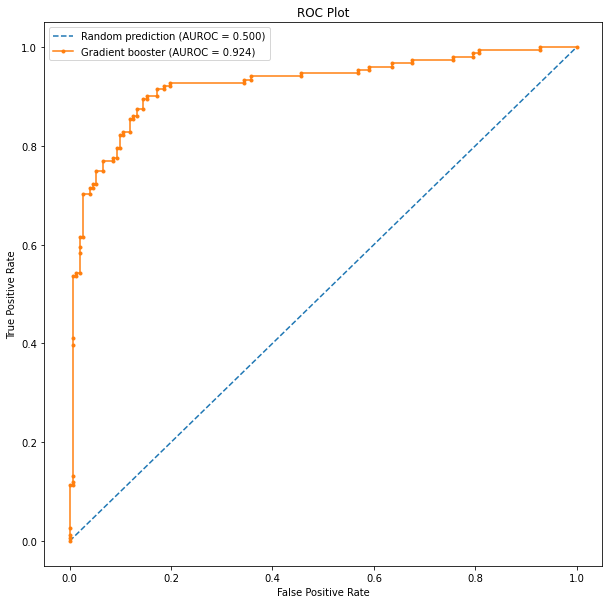

In [58]:
plt.subplots(1, figsize=(10,10))
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(mod_fpr, mod_tpr, marker='.', label='Gradient booster (AUROC = %0.3f)' % mod_auc)


# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot

plt.show()

AUROC score 0.924

### Saving the model

In [59]:
import joblib
joblib.dump(mod,"Automobile.pkl")

['Automobile.pkl']